# Сборный проект - 1 
# Закономерности определяющие успешность игры


Цель проекта:

Нам необходимо выявить, определяющие успешность игры, закономерности. Эти данные позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

1 Открытие файла с данными и изучение общей информации

2 Подготовка данных

2.1 Замена названия столбцов

2.2 Преобразование данных в нужные типы

2.3 Обработка пропусков

2.4 Расчёт суммарных продаж во всех регионах и запись их в отдельный столбец

3 Исследовательский анализ данных

3.1 Сколько игр выпускалось в разные годы

3.2 Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами и  распределение по годам. Характерный срок появления новых и исчезновения старых платформ

3.3 Данные за актуальный период с 2013 по 2016 годы

3.4 Платформы лидирующие по продажам. Несколько потенциально прибыльных платформ

3.5 Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

3.6 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и расчёт корреляции между отзывами и продажами

4 Портрет пользователя каждого региона

4.1 Самые популярные платформы (топ-5)

4.2 Самые популярные жанры (топ-5)

4.3 Влияние рейтинга ESRB на продажи в отдельном регионе

5 Проверка гипотез

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

6 Общий вывод

Описание значения столбцов в данных для удобства в работе:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Открытие файла и изучение общей информации

In [1]:
import pandas as pd # Импортируем библиотеки.
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')# Читаем файл, одновремено разделяем. Назовём data. 

In [3]:
data.head(20) # Вывод на экран 20 строк, для просмотра таблицы.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()# Получаем сводную информацию по датасету.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe().round(2) # Получаем сводную информацию по датасету

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


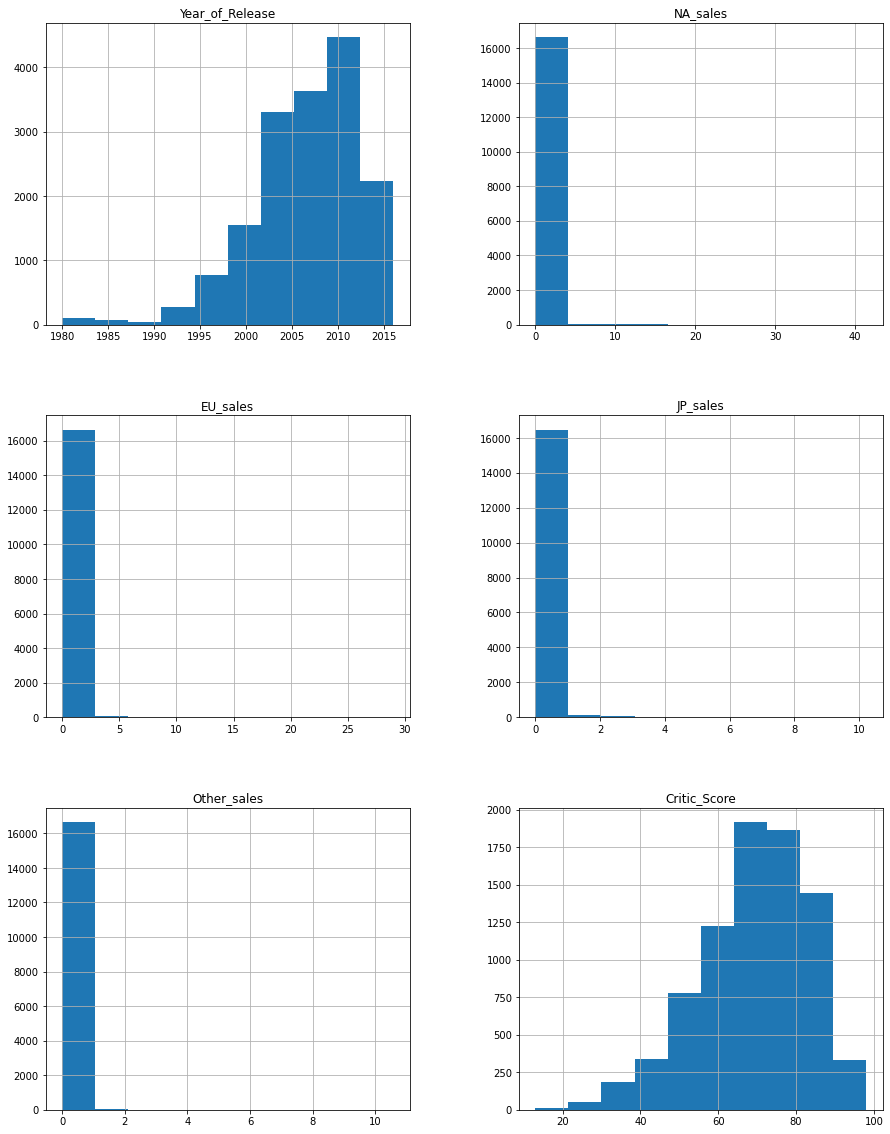

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.duplicated().sum()# Проверяем на наличие явных дубликатов. Дубликатов нет.

0

Вывод: из выше представленной инфрмации видно следующее, что в датасете в наваниях столбцов, разный регистр; есть пропуски; есть аномальные значения, несоответствие типов данных, нужно поправить год даты; по гистограммам видно, что присутствуют шумы и выбросы в значениях. Проверили на наличие дубликатов. Дубликатов не обнаружено.

 ## Подготовка данных

2.1 Замена названия столбцов

In [8]:
data.columns = data.columns.str.lower() # Приводим столбцы к общему стилю. Нижниму регистру.

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


2.2 Преобразование данных в нужные типы

In [10]:
data = data.convert_dtypes() # Автоматически переводим типы данных в нужный тип.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  Float64
 5   eu_sales         16715 non-null  Float64
 6   jp_sales         16715 non-null  Float64
 7   other_sales      16715 non-null  Float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  string 
 10  rating           9949 non-null   string 
dtypes: Float64(4), Int64(2), string(5)
memory usage: 1.5 MB


In [12]:
data['year_of_release'].unique()# Посмотрели уникальные значения стлбца. Ничего подозрительного не 
# обнаружено.

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,<NA>,<NA>


Столбцы "name", "platform", "genre", "rating" из типа данных object превели в тип string, поскольку
является строками. Столбец "user_score", нужно перевести в Float64, но не получается из за значения 
"tbd", далее его заменим. Столбец "year_of_release" из Float64 в int целые числа.

2.3 Обработка пропусков

In [14]:
data.isna().sum()# Выводим количество пропущенных значений для каждого столбца.

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В name удалим пропуски - не несут информацию их всего 2, tbd  заменим на NaN,  остальные 
пропуски оставлю, чтобы  не искажать результаты средним или медианным, вычислениям не помешают. 
Эти данные нельзя просто так отбросить, потому что ещё могут пригодиться для дальнейшего анализа.

In [15]:
data.dropna(subset=['name'], inplace=True)# Удаляем пропуски в столбце.

In [16]:
data['name'].isna().sum()# Проверяем на наличие пропусков. Пропусков нет.

0

In [17]:
data['user_score'].unique()# Смотрим уникальные значения. Обращяем внимание на tbd.

<StringArray>
[  '8',  <NA>, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
   '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4',
 '7.8', '7.5', '2.6', '7.2', '9.2',   '7', '7.3', '4.3', '7.6', '5.7',   '5',
 '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4',   '4',
 '4.9', '4.5', '9.3', '6.2', '4.2',   '6', '3.7', '4.1', '5.8', '5.6', '5.5',
 '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5',
 '2.5', '1.9',   '3', '2.7', '2.2',   '2', '9.5', '2.1', '3.6', '2.8', '1.8',
 '3.8',   '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
 '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9',   '1', '9.7']
Length: 97, dtype: string

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN#  Аббревиатуру 'tbd' меняем на NaN.

In [19]:
data['user_score'] = data['user_score'].astype('float')# Перевли столбец в соответствующий тип.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16713 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16713 non-null  Float64
 5   eu_sales         16713 non-null  Float64
 6   jp_sales         16713 non-null  Float64
 7   other_sales      16713 non-null  Float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
dtypes: Float64(4), Int64(2), float64(1), string(4)
memory usage: 1.6 MB


2.4 Расчёт суммарных продаж во всех регионах и запись их в отдельный столбец

In [21]:
data['sum_sales_game'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# суммарные продажи во всех регионах.

In [22]:
data.head(1)# Проверили наличие столбца.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales_game
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [23]:
data.dropna(subset=['year_of_release'], inplace=True)# Удаляем пропуски в столбце.

In [24]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  string 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  string 
 4   na_sales         16444 non-null  Float64
 5   eu_sales         16444 non-null  Float64
 6   jp_sales         16444 non-null  Float64
 7   other_sales      16444 non-null  Float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   string 
 11  sum_sales_game   16444 non-null  float64
dtypes: Float64(4), Int64(2), float64(2), string(4)
memory usage: 1.7 MB
None
-------------------------
name <StringArray>
[                        ' Beyblade Burst',
                      ' Fire Emblem Fates',
                   " Frozen: Olaf's 

В name удалим пропуски - не несут информацию их всего 2, tbd заменим на NaN,  в столбце year_of_release пропуски удаляем, потомучто их мало, на результаты не влияет. Остальные пропуски оставлю, чтобы не искажать результаты средним или медианным, вычислениям не помешают. Эти данные нельзя просто так отбросить, потому что ещё могут пригодиться для дальнейшего анализа. Если в дальнейшем понадобиться поменяем пропуски в столбце "рейтинг ESRB" на "unknown".
Причины, которые могли привести к пропускам в данных:
 - При сборе информации не указали значение в ячейке.
 - Ошибка в записи.
 - Ошибки при выгрузке файла.
 - Смена формата файла.

## Исследовательский анализ данных

3.1 Сколько игр выпускалось в разные годы

In [25]:
data.pivot_table(index='year_of_release',values='name', aggfunc='count')# Таблица количества игр,
# выпущенных в разные годы.

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Данные за разные периоды важны, потому что, по ним можно произвести анализ и сделать выводы. 
До 2009 года наблюдается рост количества игр. С 2012 года идёт значительное падение количества игр. 

3.2 Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок появления новых и исчезновения старых платформ

In [26]:
data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales_game'].sum()

,na_sales,eu_sales,jp_sales,other_sales,sum_sales_game
platform,,,,,
2600,80.78,4.86,0.0,0.84,86.48
3DO,0.0,0.0,0.1,0.0,0.10
3DS,82.65,61.27,100.62,13.27,257.81
DC,5.43,1.69,8.56,0.27,15.95
DS,380.31,188.41,175.02,59.04,802.78
GB,113.64,47.51,85.12,8.16,254.43
GBA,184.12,74.59,46.56,7.61,312.88
GC,131.94,38.32,21.34,5.13,196.73
GEN,19.27,5.52,2.67,0.89,28.35


Выбираем  платформы с наибольшими суммарными продажами Wii, X360, PS2, PS3, DS, PS.  

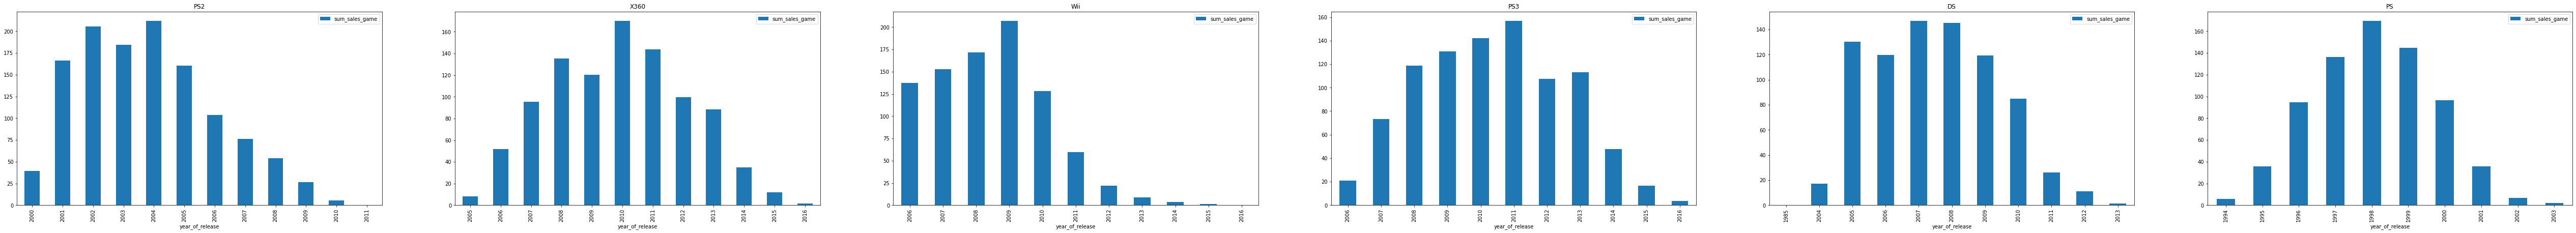

In [27]:
platforms = ('PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS')

fig, ax = plt.subplots(1, len(platforms), figsize=(15*len(platforms), 7))
for idx, platforms in enumerate(platforms):
    temp = data[data['platform'] == platforms].pivot_table(index='year_of_release', values='sum_sales_game', aggfunc='sum')
    temp.index = temp.index.astype(int)
    temp.plot(kind='bar', ax=ax[idx])
    ax[idx].set_title(platforms)
plt.show()# Строим графики для каждой платформы.

Из графиков видно, что платформы существуют 8-10 лет. Актуальный период для составления прогноза на 2017 год возьмём с 2013 по 2016 год, 4 года должно быть нормально для данной,динамично развивающийся и быстро меняющийся индустрии.

3.3 Данные за актуальный период с 2013 по 2016 годы

In [28]:
actual_data = data.query('year_of_release >= 2013')# Выделяем года по которым смотрим динамику
# продаж.  

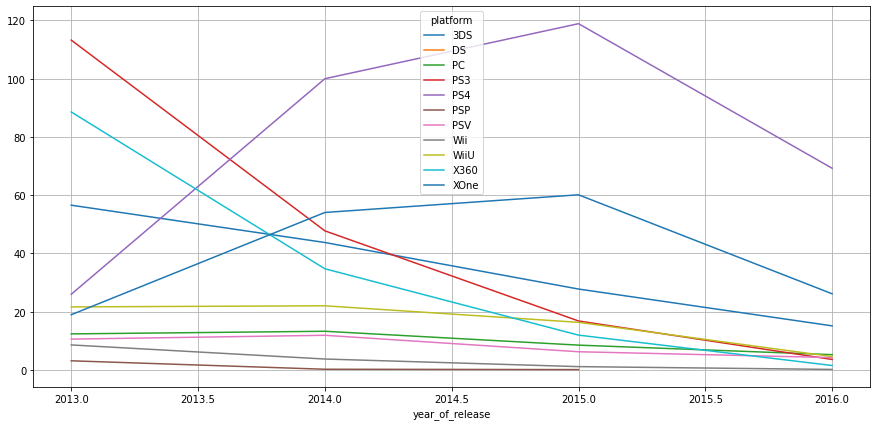

In [29]:
actual_data.pivot_table(index='year_of_release', columns = 'platform', 
values='sum_sales_game', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

3.4 Платформы лидирующие по продажам. Несколько потенциально прибыльных платформ

In [30]:
actual_data.groupby(['platform'])['sum_sales_game'].sum()# Смотрим показатели в другой визуализации.

platform
3DS     143.25
DS        1.54
PC       39.43
PS3     181.43
PS4     314.14
PSP       3.50
PSV      32.99
Wii      13.66
WiiU     64.63
X360    136.80
XOne    159.32
Name: sum_sales_game, dtype: float64

Из графика видно, что по всем платфрмам происходит падение продаж. По продажам за актуальный период один явный лидер PS4, далее 4 платформы, находящиеся, примерно в одном диапазоне PS3, XOne, 3DS и X360. По двум платформа PS4 и XOne наблюдается увеличение продаж к 2015 году, далее вниз.   На остальные консоли уже давно упал спрос. Возможно пользователи перешли на игры для стационарных компьютеров и ноутбуков. 

3.5 Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

[Text(0.5, 1.0, 'Продажи платформам'),
 Text(0.5, 0, 'platform'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 3.0)]

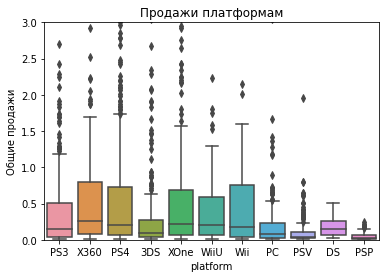

In [31]:
sns.boxplot(data = actual_data, y = 'sum_sales_game', x='platform').set(title = 
'Продажи платформам', xlabel = 'platform', ylabel = 'Общие продажи', 
ylim=(0, 3))

[Text(0.5, 1.0, 'Продажи платформам'),
 Text(0.5, 0, 'platform'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 14.0)]

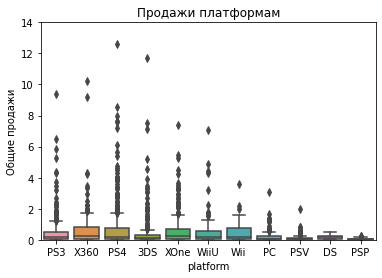

In [32]:
sns.boxplot(data = actual_data, y = 'sum_sales_game', x='platform').set(title = 
'Продажи платформам', xlabel = 'platform', ylabel = 'Общие продажи', 
ylim=(0, 14))

Исходя из графиков видно, что медиана и 75% квантиль больше у пяти платформ PS4, X360, XOne, Wii иWiiU.Данные платформы наиболее интересны для продажи игр для них. Топовые по продажам игры бывают на разных платформах, диаграмма размаха позволить нам сравнить, где их больше, по выбросам выше усов. Помимо  пяти платформ обозначенных выше, топовые игры, которые должны хорошо продаваться, есть у PS3, 3DS, PC и PSV. Увеличение асортимента магазина - увеличивает прибыль. Наличие практически одинаковых параметров у некоторых платформ, может указывать на то, что платформы являются прямыми конкурентами, играют на одних и тех же территориальных рынках и имеют схожие продажи.  

3.6 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и расчёт корреляции между отзывами и продажами

<AxesSubplot:xlabel='user_score', ylabel='sum_sales_game'>

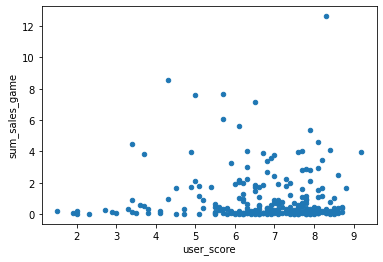

In [33]:
actual_data[actual_data['platform']=='PS4'].plot(x='user_score', y='sum_sales_game', kind='scatter')
# Диаграмма рассеяния по платформе PS4, по отзывам пользователей. 

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales_game'>

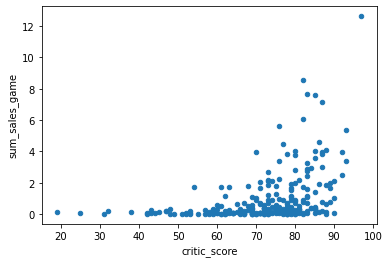

In [34]:
actual_data[actual_data['platform']=='PS4'].plot(x='critic_score', y='sum_sales_game', kind='scatter')
# Диаграмма рассеяния по платформе PS4, по отзывам критиков. 

In [35]:
actual_data[actual_data['platform']=='PS4'] [['critic_score','user_score', 'sum_sales_game']].corr()
# Корреляцию между отзывами и продажами по платформе.

,critic_score,user_score,sum_sales_game
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sum_sales_game,0.406568,-0.031957,1.000000


По таблице корреляции можно сказать, что зависимость между отзывами пользователей и продажами отсетствует. Слабая зависимость есть между оценкой критиков и продажами.
На диаграмме рассеяния мы видим, что основная масса рассеяния находиться в одном диапазоне у обеих диаграмм. Потность вначале больше по отзывам критиков.  

<AxesSubplot:xlabel='platform'>

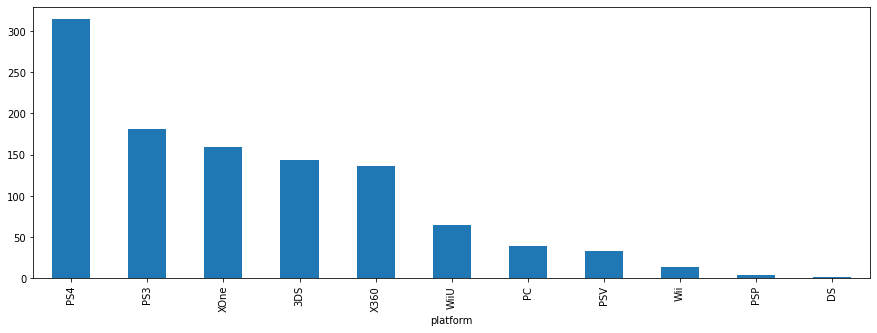

In [36]:
actual_data.groupby('platform')['sum_sales_game'].sum().sort_values\
(ascending=False).plot(x="platform", y="sum_sales_game", kind='bar', figsize=(15,5))# График продаж
# на всех платформах c 2013 по 2016 годы. 

График продаж на всех платформах с 2013 по 2016 годы, говорит о следующем, что с большим приемуществом лидирует PS4, Далее по убыванию - PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP, DS. 

3DS
critic_score      0.357057
user_score        0.241504
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


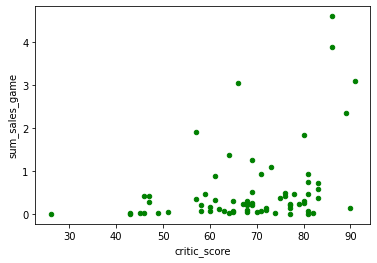

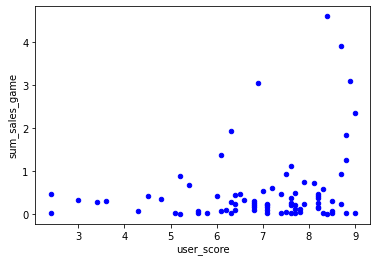

DS
critic_score      NaN
user_score        NaN
sum_sales_game    1.0
Name: sum_sales_game, dtype: float64


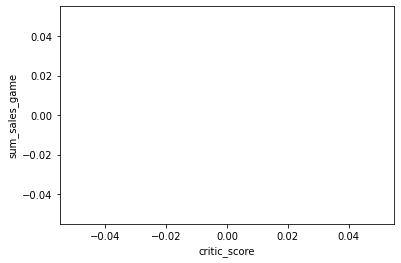

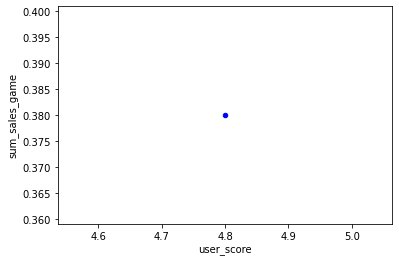

PC
critic_score      0.196030
user_score       -0.093842
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


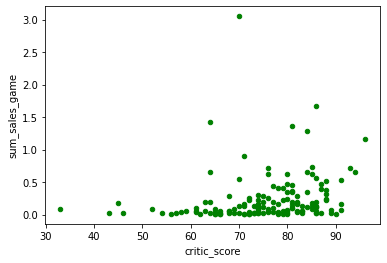

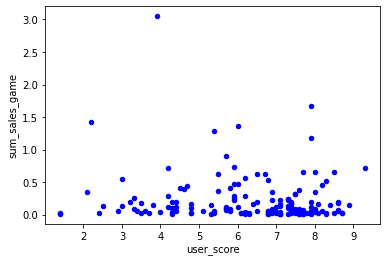

PS3
critic_score      0.334285
user_score        0.002394
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


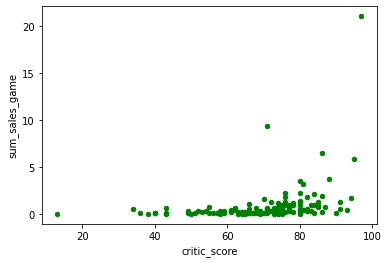

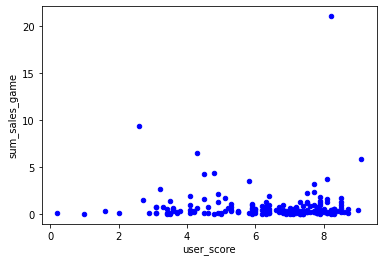

PS4
critic_score      0.406568
user_score       -0.031957
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


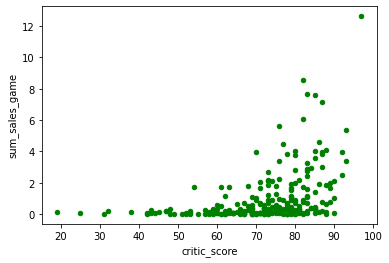

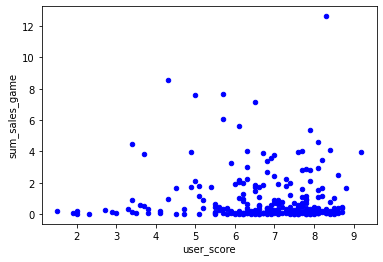

PSP
critic_score      NaN
user_score       -1.0
sum_sales_game    1.0
Name: sum_sales_game, dtype: float64


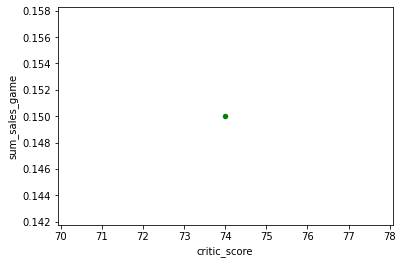

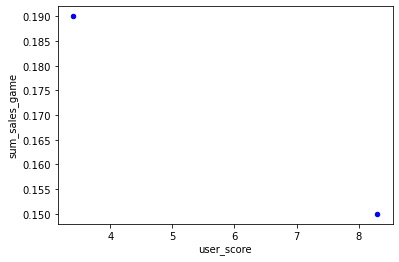

PSV
critic_score      0.254742
user_score        0.000942
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


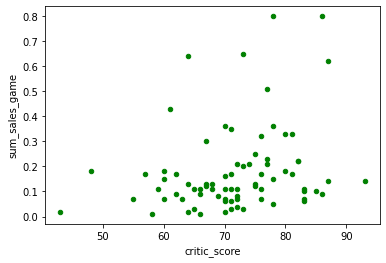

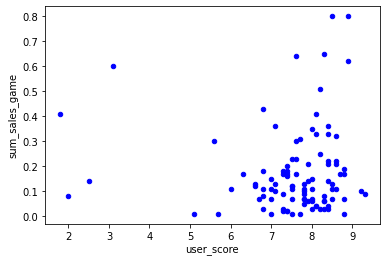

Wii
critic_score           NaN
user_score        0.682942
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


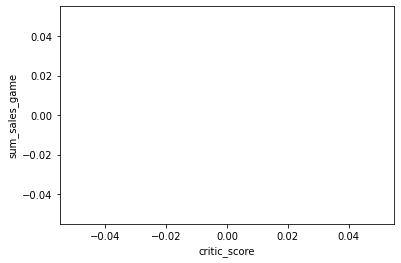

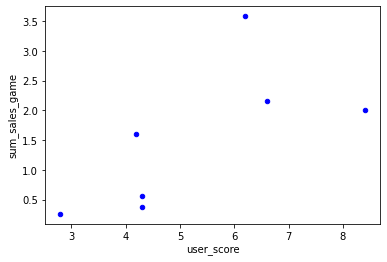

WiiU
critic_score      0.376415
user_score        0.419330
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


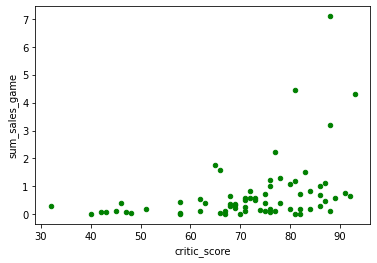

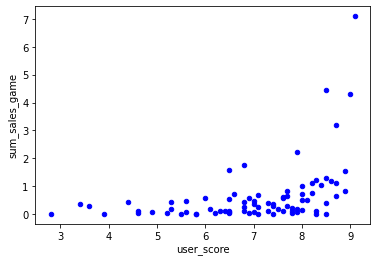

X360
critic_score      0.350345
user_score       -0.011742
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


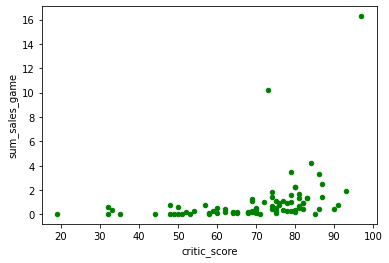

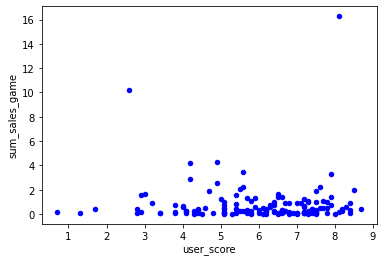

XOne
critic_score      0.416998
user_score       -0.068925
sum_sales_game    1.000000
Name: sum_sales_game, dtype: float64


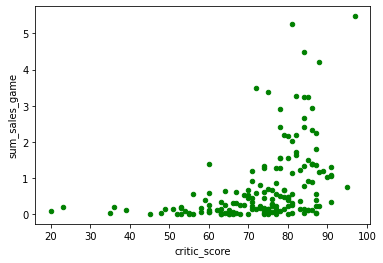

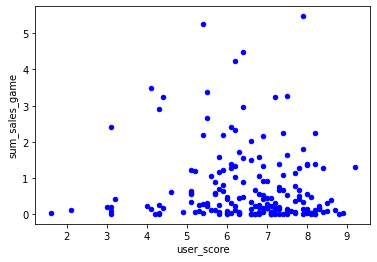

In [37]:
for platform, games in actual_data.groupby('platform'):
    print(platform)
    print(games[['critic_score', 'user_score', 'sum_sales_game']].corr()['sum_sales_game'])
    games.plot(kind='scatter', x='critic_score', y='sum_sales_game', color='green')
    games.plot(kind='scatter', x='user_score', y='sum_sales_game', color='blue')
    plt.show()# Цикл для построения графиков и вычисления кореляции по платформам за актуал. период.

Величина коэффициента корреляции шести платформ с наибольшими продажами отзывами и продажами:
 - PS4  критики слабая, пользователи отсутствует.
 - PS3  критики слабая, пользователи очень слабая.
 - XOne критики слабая, пользователи очень слабая.
 - 3DS  критики слабая, пользователи очень слабая.
 - X360 критики слабая, пользователи отсутствует.
 - WiiU критики слабая, пользователи слабая.


Практически у всех платформ присутствует слабая корреляция, между оценками пользователей и критиков к продажам.
Оценка пользователей  очень слабо влияет на продажи, чего не скажешь о оценке критиков, покупатели прислушиваются больше к критикам чем к оценкам других пользователей. по платформе  WiiU покупатели ровмерно одинаково ориентируются  на отзывы пользователей и критиков.  

array([<AxesSubplot:ylabel='sum_sales_game'>], dtype=object)

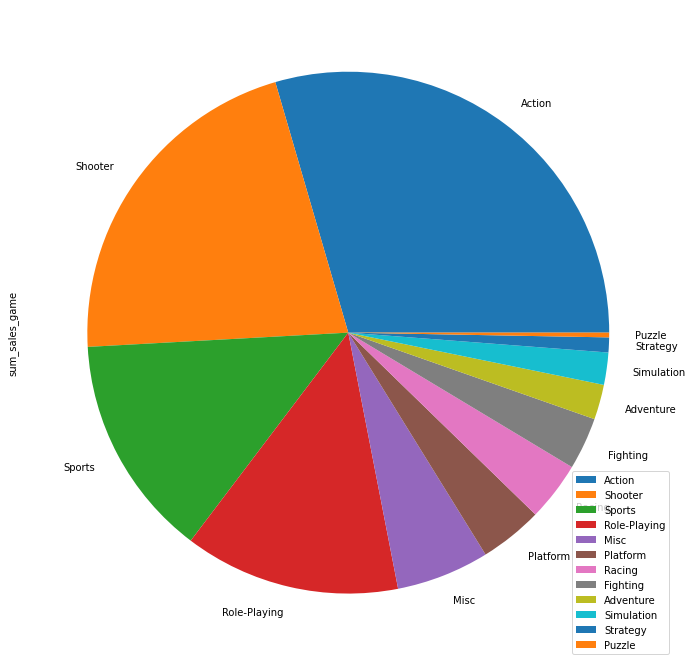

In [38]:
actual_data.pivot_table(index = 'genre', values = 'sum_sales_game', 
aggfunc = 'sum').sort_values(ascending=False, by = 'sum_sales_game').plot(kind='pie',
subplots=True, figsize=(13,12))# Круговой график

<AxesSubplot:xlabel='genre'>

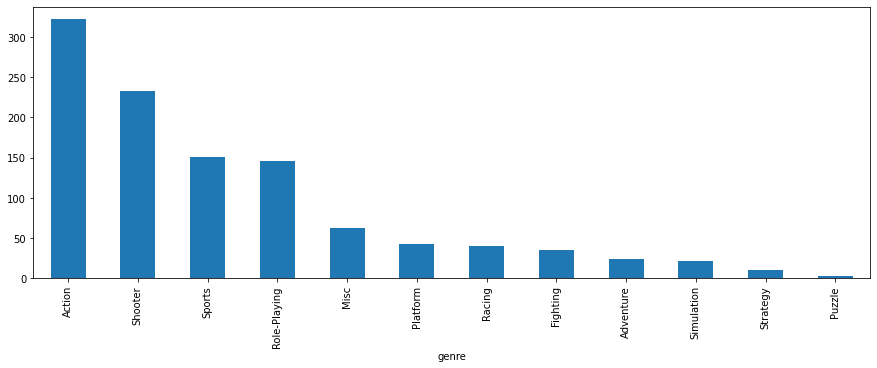

In [39]:
actual_data.groupby('genre')['sum_sales_game'].sum().sort_values\
(ascending=False).plot(x="platform", y="sum_sales_game", kind='bar', figsize=(15,5))# График продаж
# на всех платформах с 2013 по 2016 годы.

In [40]:
actual_data.pivot_table(index = 'genre', values = 'sum_sales_game', 
aggfunc = 'sum').sort_values(ascending=False, by = 'sum_sales_game')# Числовая таблица продаж по жанру

,sum_sales_game
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


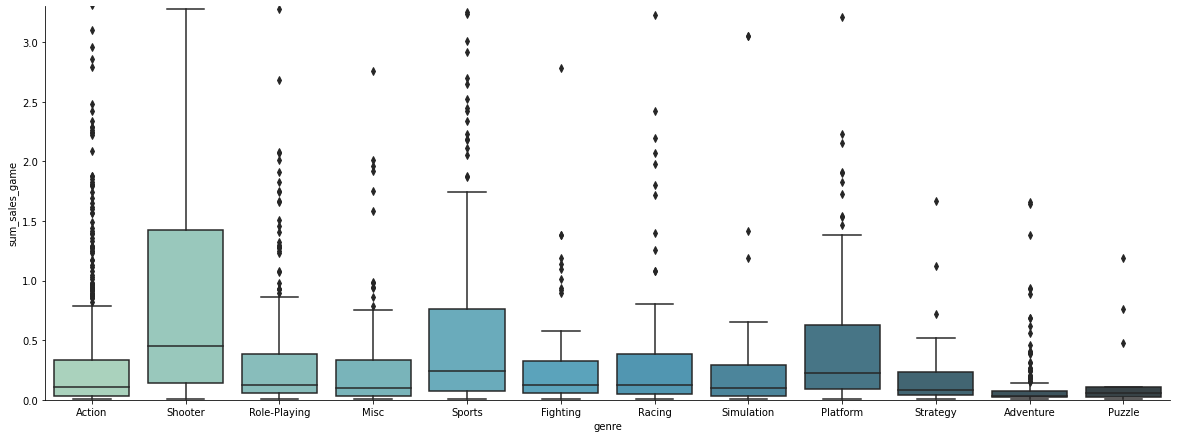

In [41]:
sns.catplot(x="genre", 
            y='sum_sales_game', 
            kind="box", 
            data = actual_data, 
            orient='v', 
            height=6, 
            aspect=2.7, 
            palette='GnBu_d')
_ = plt.ylim(0, 3.3)# График «ящик с усами» по глобальным 
# продажам игр в разбивке по платформам с 2013 по 2016 годы.


По диаграмме и таблице выделяются четыре жанра с большими продажами Shooter, Action, Sports, Role-Playing. Остальные жанры Misc, Fighting, Adventure, Racing, Platform, Simulation, Strategy, Puzzle не блещут продажами по сравнению с более прибыльными жанрами. По графику с усами можно определить стабильные жанры, которые приносят доход не зависимо от платформы и на них есть есть устойчивый спрос. Таких лидирующих жанра три Shooter, Sports и Platform. Совпадение жанров по максимальным продажам и устойчиврму спросу происходит по двум жанрам Shooter и Sports.  	 

## Портрет пользователя каждого региона

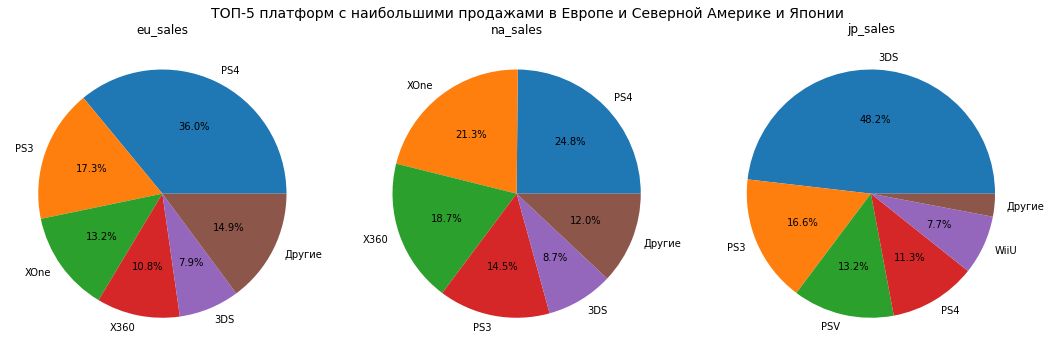

In [42]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data.query('year_of_release > 2012').groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

По диаграммам сразу видно различия в долях продаж разных платформ по регионам. В Европе и Северной Америке лидирует PS4. Причём в Европе количество продаж на 11 процентов больше чем в Северной Америке. В Японии ситуация другая - лидер продаж 3DS. Почти половина рынка 48%. Платформа XOne в Европе находится на третьем месте, в Северной Америке находится на втором месте. В Японии XOne отсутствует на рынке.  На втором месте в Европе находится PS3, так же как и в Японии с практически одинаковыми показателями. В Японии PSV на третьем месте. PSV на рынках Европы и Северной Америки отсутствует. PS4 на рынке Японии находится на четвёртом месте. Данные показатели свидетельствуют о том что предпочтения пользователей Европы и Северной Америки во многом схожи, или маркетинг так работает. Предпочтения пользователей Японии отличаются кардинально. 

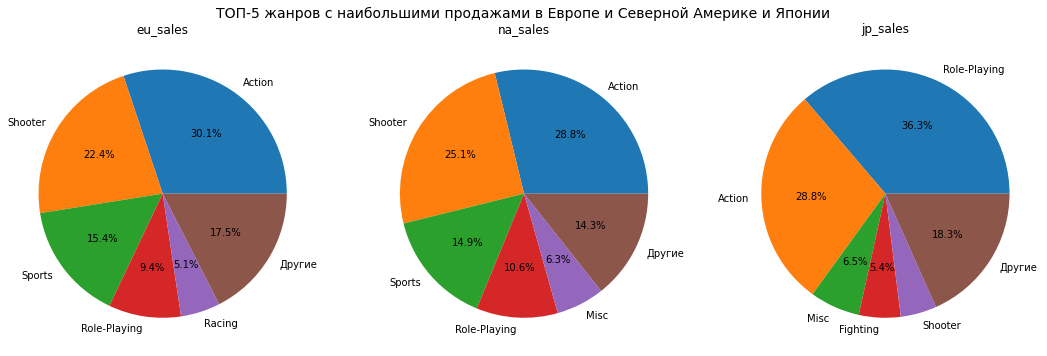

In [43]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data.query('year_of_release > 2012').groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В Европе и Северной Америке лидируют три направления жанров Shooter, Action, и Sports. Предпочтения по жанрам одинаковые. В Японии  Role-Playing, Action.  Предпочтения пользователей Японии по популярным жанрам отличаются от предпочтений пользователей Европы и Северной Америки .	

In [44]:
data.loc[:, 'rating'] = data.loc[:, 'rating'].fillna('unknown')# Заглушка на пропуски в рейтинге ESRB.

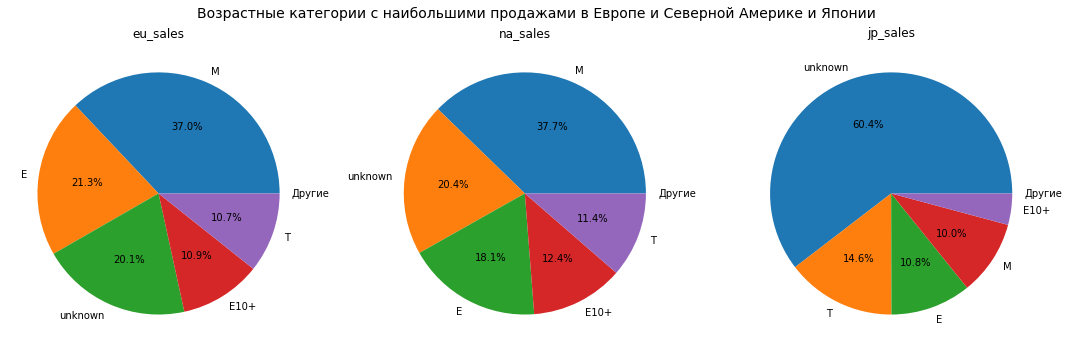

In [45]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data.query('year_of_release > 2012').groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['rating'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('Возрастные категории с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
temp = data.query('year_of_release > 2014').copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: Int64

E - от 6 лет, E10+ - от 10 лет, T - от 13 лет, M - от 17 лет. 

Поскольку рейтинг ESRB предназначен для маркировки игр для США и Канады, сделаем корректировку исходя из данной информации. Показатели по Японскому рынку скорее всего некоректные, так как пропусков 60 процентов. Показатели пропусков Европы и Северной Америки практически одинаковы. Результаты по данным регионам скорее всего корректны. Лидирующие возрастные категории в Европе и Северной Америке это лица от 17 лет и от 6 лет. В Японии немного подругому  - лица от 13 лет, лица от 6 лет и лица от 17 лет. По всем регтонам прослеживается лидирующяя категория от 6 лет.

## Проверка гипотез

 Гипотеза 1 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

 Гипотеза 2 - cредние пользовательские рейтинги жанров Action и Sports разные

 Гипотеза №1.

H0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.

α=5%

In [47]:
xone = actual_data.query('platform == "XOne"')['user_score'].dropna()
pc = actual_data.query('platform == "PC"')['user_score'].dropna()
# Сохраним в переменных данные за актуальный данные за актуальный период.
print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean().round(2))
print('Средний пользовательский рейтинг платформы PC:', pc.mean().round(2))
alpha = 0.05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One: 6.52
Средний пользовательский рейтинг платформы PC: 6.27
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Гипотеза 1 подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые. Нулевая гипотеза всегда предполагает равенство средних исследуемых генеральных совокупностей. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки использованы данные из двух выборок (оценок пользователей по каждой из платформ XOne и PC) Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. 

В итоге, не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к. полученная вероятность совпадения значений больше критического уровня статистической значимости, который для данной индустрии подойдёт 5%.


 Гипотеза №2.

H0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

α=5%

In [48]:
action = actual_data.query('genre == "Action"')['user_score'].dropna()
sports = actual_data.query('genre == "Sports"')['user_score'].dropna()
# Сохраним в переменных  соответствующие данные с пользовательскими оценками.
print('Средний пользовательский рейтинг жанра Action:', action.mean().round(2))
print('Средний пользовательский рейтинг жанра Sports:', sports.mean().round(2))

alpha = 0.05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.84
Средний пользовательский рейтинг жанра Sports: 5.24
p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Гипотеза 2 подтвердилась, средние пользовательские рейтинги жанров Action и Sports разные.

Проверена гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value.

Нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые отвергли. 

## Общий вывод

При выводе первоначальной информации мы увидели следующее, что в датасете в наваниях столбцов, разный регистр; есть пропуски; есть аномальные значения, несоответствие типов данных, нужно поправить год даты; по гистограммам видно, что присутствуют шумы и выбросы в значениях. Проверили на наличие дубликатов. Дубликатов не обнаружено.
 - Столбцы "name", "platform", "genre", "rating" из типа данных object превели в тип string, поскольку является строками. Столбец "user_score", нужно перевести в Float64, но не получается из за значения "tbd", далее его заменим. Столбец "year_of_release" из Float64 в int целые числа.
 - В name удалим пропуски - не несут информацию их всего 2, tbd заменим на NaN, остальные пропуски оставили, чтобы не искажать результаты средним или медианным - вычислениям не помешают. Эти данные нельзя просто так отбросить, потому что ещё могут пригодиться для дальнейшего анализа.

Данные за разные периды важны, потому что, по ним можно произвести анализ и сделать выводы. До 2009 года наблюдается рост количества игр. Возмжно с 2009 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр. С 2012 года идёт значительное падение количества продаж игр.

За весь период представленный в изначальном датасете выявилось шесть платформ с наибольшими суммарными продажами Wii, X360, PS2, PS3, DS, PS.

Из графиков видно, что платформы существуют 8-10 лет. 

Актуальный период для составления прогноза на 2017 год возьмём с 2013 по 2016 год, потому что в данной сфере ситуация быстро меняется, большой период для прогноза брать не стоит.

Из графика видно, что по всем платфрмам происходит падение продаж. По продажам за актуальный период один явный лидер PS4, далее 4 платформы, находящиеся, примерно в одном диапазоне PS3, XOne, 3DS и X360. По двум платформа PS4 и XOne наблюдается увеличение продаж к 2015 году, далее вниз. На остальные консоли уже давно упал спрос. Возможно пользователи перешли на игры для стационарных компьютеров и ноутбуков.

Из графиков с усами видно, что медиана и 75% квантиль больше у пяти платформ PS4, X360, XOne, Wii иWiiU. Данные платформы наиболее интересны для продажи игр для них. Топовые по продажам игры бывают на разных платформах, диаграмма размаха позволить нам сравнить, где их больше, по выбросам выше усов. Помимо пяти платформ обозначенных выше, топовые игры, которые должны хорошо продаваться, есть у PS3, 3DS, PC и PSV. Увеличение асортимента магазина - увеличивает прибыль. Наличие практически одинаковых параметров у некоторых платформ, может указывать на то, что платформы являются прямыми конкурентами, играют на одних и тех же территориальных рынках и имеют схожие продажи.

По таблице корреляции можно сказать, что зависимость между отзывами пользователей и продажами отсетствует. Слабая зависимость есть между оценкой критиков и продажами. На диаграмме рассеяния мы видим, что основная масса рассеяния находиться в одном диапазоне у обеих диаграмм. Потность вначале больше по отзывам критиков.

График продаж на всех платформах с 2013 по 2016 годы, говорит о следующем, что с большим приемуществом лидирует PS4, Далее по убыванию - PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP, DS.

Из построения графиков и вычисления кореляции по нескольким платформам, мы видим следующее, практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам. Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам, чем к оценкам пользователей.

По диаграмме и таблице выделяются четыре жанра с большими продажами Shooter, Action, Sports, Role-Playing. Остальные жанры Misc, Fighting, Adventure, Racing, Platform, Simulation, Strategy, Puzzle не блещут продажами по сравнению с более прибыльными жанрами. По графику с усами можно определить стабильные жанры, которые приносят доход не зависимо от платформы и на них есть есть устойчивый спрос. Таких лидирующих жанра три Shooter, Sports и Platform. Совпадение жанров по максимальным продажам и устойчиврму спросу происходит по двум жанрам Shooter и Sports.

Портрет пользователя каждого региона. По диаграммам сразу видно различия в долях продаж разных платформ по регионам. В Европе и Северной Америке лидирует PS4. Причём в Европе количество продаж на 11 процентов больше чем в Северной Америке. В Японии ситуация другая - лидер продаж 3DS. Почти половина рынка 48%. Платформа XOne в Европе находится на третьем месте, в Северной Америке находится на втором месте. В Японии XOne отсутствует на рынке. На втором месте в Европе находится PS3, так же как и в Японии с практически одинаковыми показателями. В Японии PSV на третьем месте. PSV на рынках Европы и Северной Америки отсутствует. PS4 на рынке Японии находится на четвёртом месте. Данные показатели свидетельствуют о том что предпочтения пользователей Европы и Северной Америки во многом схожи, или маркетинг так работает. Предпочтения пользователей Японии отличаются кардинально. 

В Европе и Северной Америке лидируют три направления жанров Shooter, Action, и Sports. Предпочтения по жанрам одинаковые. В Японии Role-Playing, Action. Предпочтения пользователей Японии по популярным жанрам отличаются от предпочтений пользователей Европы и Северной Америки .

Поскольку рейтинг ESRB предназначен для маркировки игр для США и Канады, сделаем корректировку исходя из данной информации. Показатели по Японскому рынку скорее всего некоректные, так как пропусков 60 процентов. Показатели пропусков Европы и Северной Америки практически одинаковы. Результаты по данным регионам скорее всего корректны. Лидирующие возрастные категории в Европе и Северной Америке это лица от 17 лет и от 6 лет. В Японии немного подругому - лица от 13 лет, лица от 6 лет и лица от 17 лет. По всем регтонам прослеживается лидирующяя категория от 6 лет.

Проверка гипотез. Гипотеза 1 подтвердилась, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулирована нулевая гипотеза, о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые. Нулевая гипотеза всегда предполагает равенство средних исследуемых генеральных совокупностей. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки использованы данные из двух выборок (оценок пользователей по каждой из платформ XOne и PC) Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. В итоге, не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Т.к. полученная вероятность совпадения значений больше критического уровня статистической значимости, который для данной индустрии подойдёт 5%.

Гипотеза 2 подтвердилась, средние пользовательские рейтинги жанров Action и Sports разные.
Проверена гипотеза, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые отвергли.

Для прогноза будущих продаж на 2017 год были взяты данные с 2013 по 2016 год, так как технологии меняются  быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, Action, и Sports в Европе и Северной Америке, В Японии жанр Role-Playing, Action. В Европе и Северной Америке будут пользоваться популярностью игры для платформ  PS4, XOne, PS3. В Японии пользоваться популярностью будут игры для платформ 3DS, PS3, PSV. Возрастной рейтинг в Европе и Северной Америке это лица от 17 лет и от 6 лет. В Японии немного подругому - лица от 13 лет, лица от 6 лет и лица от 17 лет. Но погрешность в данных очень большая 60%, нужно её учитывать.      